# Thông Tin
1. MSSV: 20520800
2. Họ và tên: Đặng Anh Tiến
3. Bài tập: Bài tập 3
4. Ngày thực hiện: 12/10/2021

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Yêu Cầu 1


1.   Phân lớp ảnh: dogs vs cats
2.   Phương pháp: KNN
3.   Feature: Histogram
4.   Color: grayscale



In [ ]:
import os
import cv2 as cv
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
DATA_DIR = '/gdrive/MyDrive/CS231.M11/Baitap/Dataset/dogscats_small'
TRAIN_SET = 'train'
TEST_SET = 'test'
TEST_SET_1 = 'test1'

In [ ]:
def TinhHist(pathfilename):
  img = cv.imread(pathfilename,0)
  hist = cv.calcHist([img],[0],None,[256],[0,256])
  size = img.shape[0]*img.shape[1]
  hist = hist / size
  return hist

In [ ]:
def ReadData(path_to_files, hist = 0, hog = 0):
  features = []
  labels = []
  for img in tqdm(os.listdir(path_to_files)):
    label = img.split(os.path.sep)[-1].split(".")[0]
    labels.append(label)
    if hist == 1:
      features.append(TinhHist(os.path.join(path_to_files, img)))
    if hog == 1:
      pass
  return features, labels

In [ ]:
X_train, y_train = ReadData(os.path.join(DATA_DIR, TRAIN_SET), hist = 1)

100%|██████████| 42/42 [00:00<00:00, 165.05it/s]


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (42, 256, 1)
y_train shape: (42,)
X_train shape: (42, 256)
y_train shape: (42,)


In [ ]:
model_with_k_1 = KNeighborsClassifier(n_neighbors=1)
model_with_k_3 = KNeighborsClassifier(n_neighbors=3)
model_with_k_5 = KNeighborsClassifier(n_neighbors=5)
model_with_k_1.fit(X_train, y_train)
model_with_k_3.fit(X_train, y_train)
model_with_k_5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
X_test, y_test = ReadData(os.path.join(DATA_DIR, TEST_SET_1), hist = 1)
X_test = np.array(X_test)
y_test = np.array(y_test)
print()
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

100%|██████████| 20/20 [00:00<00:00, 172.63it/s]


X_test shape: (20, 256, 1)
y_test shape: (20,)
X_test shape: (20, 256)
y_test shape: (20,)


In [ ]:
acc1 = model_with_k_1.score(X_test, y_test)
acc3 = model_with_k_3 .score(X_test, y_test)
acc5 = model_with_k_5.score(X_test, y_test)
print("Accuracy Score k = 1: {}".format(acc1))
print("Accuracy Score k = 3: {}".format(acc3))
print("Accuracy Score k = 5: {}".format(acc5))

Accuracy Score k = 1: 0.55
Accuracy Score k = 3: 0.45
Accuracy Score k = 5: 0.6


# Yêu Cầu 2


1.   Phân lớp ảnh: dogs vs cats
2.   Phương pháp: Logistic Regression
3.   Feature: Histogram
4.   Color: grayscale



In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Accuracy Score Logistic Model: {}".format(model.score(X_test, y_test)))

Accuracy Score Logistic Model: 0.45


In [ ]:
import imutils

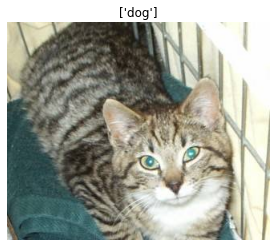

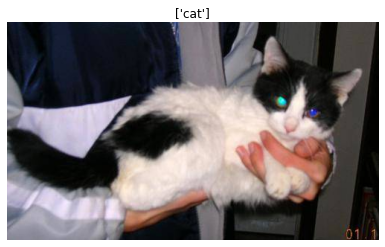

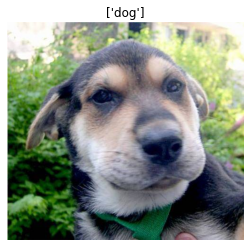

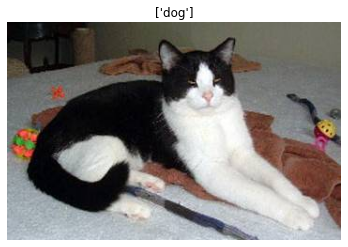

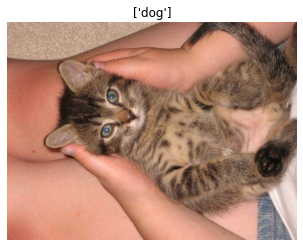

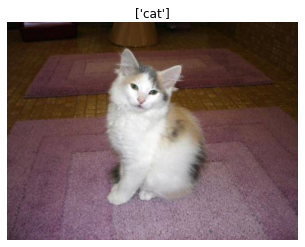

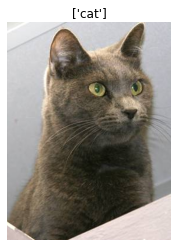

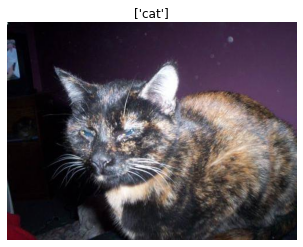

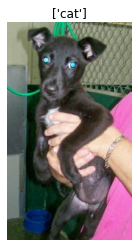

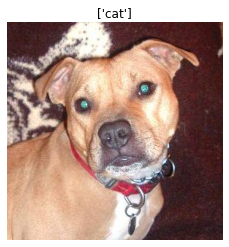

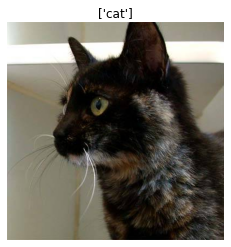

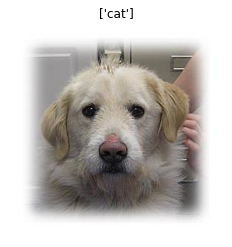

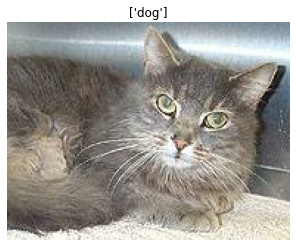

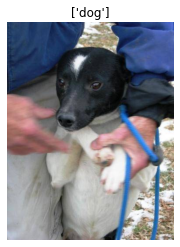

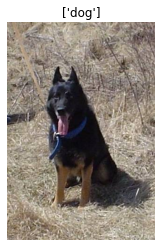

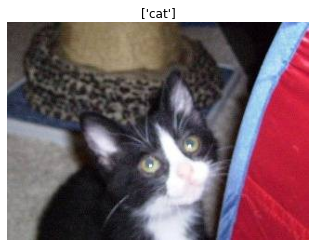

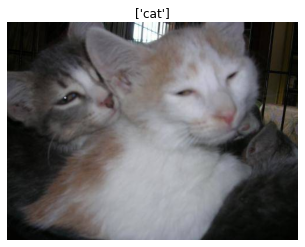

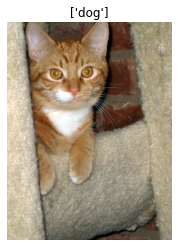

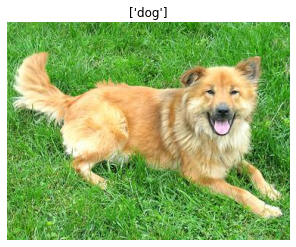

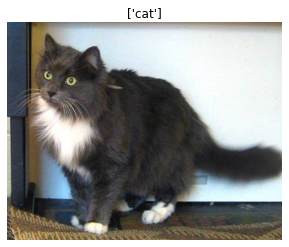

In [ ]:
for img in os.listdir(os.path.join(DATA_DIR, TEST_SET)):
  image_arr = cv.imread(os.path.join(DATA_DIR, TEST_SET, img))
  
  fd = TinhHist(os.path.join(DATA_DIR, TEST_SET, img))
  fd = np.array(fd)
  fd = fd.reshape(1, -1)
  pred = model_with_k_5.predict(fd)
  plt.figure(figsize=(8,4))
  plt.imshow(imutils.opencv2matplotlib(image_arr))
  plt.axis('off')
  plt.title(pred)